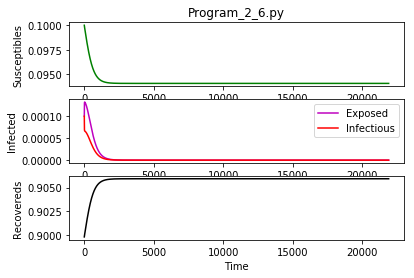

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#mu=1/(70*365.0)
beta=520/365.0
sigma=1/14.0
gamma=1/7.0
ND=60*365.0
TS=1.0
S0=0.1
E0=1e-4
I0=1e-4
INPUT = (S0, E0, I0)

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = - beta * V[0] * V[2] 
	Y[1] = beta * V[0] * V[2] - sigma * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] 
	return Y   # For odeint



t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])


#Ploting
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_6.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-m', label='Exposed')
pl.plot(RES[:,2], '-r', label='Infectious')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(Rec, '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()

In [64]:

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((5))
	V = INP    
	Y[0] = - beta * V[0] * V[2] 
	Y[1] = beta * V[0] * V[2] - sigma * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] -mu_d*V[2]
	Y[3]=mu_d*V[2]
	Y[4]=gamma*V[2]
	return Y   # For odeint


In [78]:
beta_range=100
beta_val=np.linspace(0.001,100.0,beta_range)
RES=np.zeros((365+1,5,beta_range))
for i in range(beta_range):
    beta=beta_val[i]

    gamma=1/10.0
    sigma=1/12.0

    N0=2618.0
    mu_d=334/26180
    #mu_d=0
    TS=1.0
    S0=N0-1
    E0=1
    I0=0
    D0=0
    ND=365.0
    INPUT = (S0, E0, I0,D0,0)





    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES[:,:,i] = spi.odeint(diff_eqs,INPUT,t_range)


In [7]:
np.shape(RES)

(21901, 3)

In [53]:
beta=20 
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES[:,:,-1] = spi.odeint(diff_eqs,INPUT,t_range)

In [74]:
beta_val[20]

20.202818181818184

In [54]:
RES[-1,-1,0]

296.53345380497672

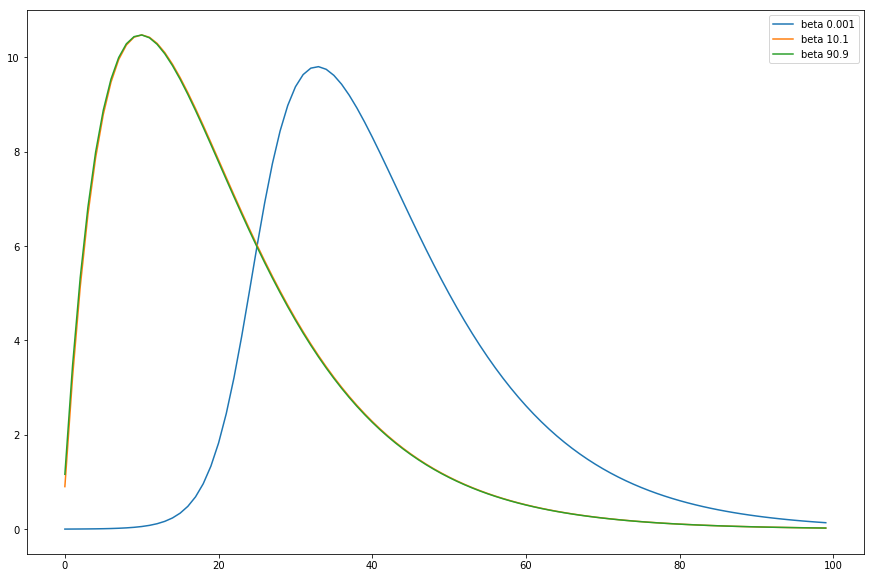

In [83]:
plt.figure(figsize=(15,10))
#plt.plot(RES[0:100,2,0],label="beta=small")
#plt.plot(RES[0:100,-1,0])
plt.plot(RES[1:101,3,0]-RES[0:100,3,0],label='beta {0:.3f}'.format(beta_val[0]))
plt.plot(RES[1:101,3,10]-RES[0:100,3,10],label='beta {0:.1f}'.format(beta_val[10]))
plt.plot(RES[1:101,3,90]-RES[0:100,3,90],label='beta {0:.1f}'.format(beta_val[90]))
#plt.plot(RES[0:100,3,99])
plt.legend()
plt.show()

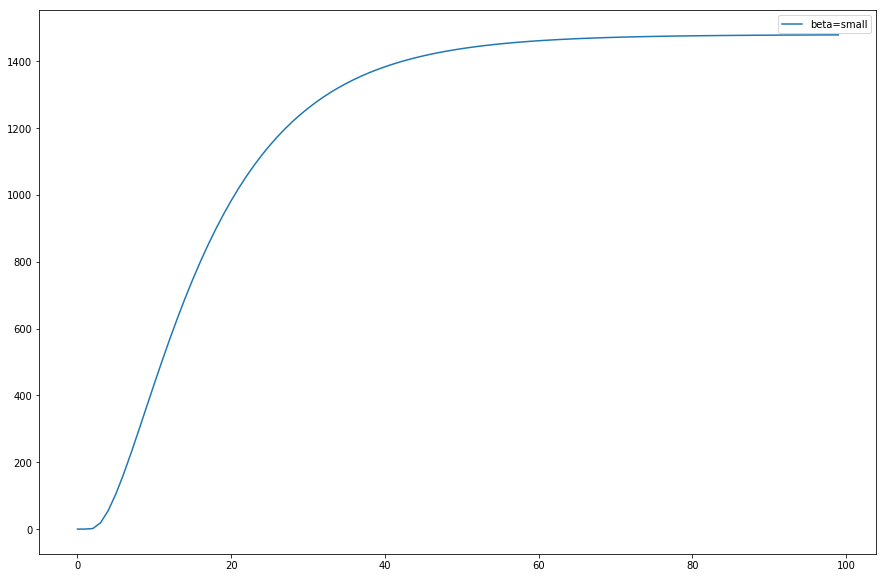

In [10]:
plt.figure(figsize=(15,10))
plt.plot(RES[0:100,-1,0],label="beta=small")
#plt.plot(RES[0:100,3,-1])
plt.legend()
plt.show()

In [15]:
for i in range(beta_range):
    if RES[-1,-1,i]==334:
        print("yes")

In [38]:
RES[-1,-1,:]

array([ 325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.21739131,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.2173913 ,
        325.2173913 ,  325.2173913 ,  325.2173913 ,  325.21739

In [17]:
beta_val

array([  0.5       ,   0.5959596 ,   0.69191919,   0.78787879,
         0.88383838,   0.97979798,   1.07575758,   1.17171717,
         1.26767677,   1.36363636,   1.45959596,   1.55555556,
         1.65151515,   1.74747475,   1.84343434,   1.93939394,
         2.03535354,   2.13131313,   2.22727273,   2.32323232,
         2.41919192,   2.51515152,   2.61111111,   2.70707071,
         2.8030303 ,   2.8989899 ,   2.99494949,   3.09090909,
         3.18686869,   3.28282828,   3.37878788,   3.47474747,
         3.57070707,   3.66666667,   3.76262626,   3.85858586,
         3.95454545,   4.05050505,   4.14646465,   4.24242424,
         4.33838384,   4.43434343,   4.53030303,   4.62626263,
         4.72222222,   4.81818182,   4.91414141,   5.01010101,
         5.10606061,   5.2020202 ,   5.2979798 ,   5.39393939,
         5.48989899,   5.58585859,   5.68181818,   5.77777778,
         5.87373737,   5.96969697,   6.06565657,   6.16161616,
         6.25757576,   6.35353535,   6.44949495,   6.54

In [70]:
import pandas as pd
data2=pd.read_csv('data2.csv')

In [71]:
cause=pd.Series(data2['Cause of Death'])

measles=data2[cause.str.contains('measles')==True]

In [72]:
measles_date=measles['Deathdate'].values

In [78]:
measles_date[0][3:5]

'06'

In [73]:
measles_yr=np.zeros(len(measles_date))
for i in range(len(measles_date)):
    measles_yr[i]=int(measles_date[i][6:10])

In [79]:
for i in range(len(measles_date)):
    if measles_yr[i]==1911:
        if measles_date[i][3:5]=='02' or measles_date[i][3:5]=='11':
            print(measles_date[i])

15/11/1911
26/02/1911
17/11/1911


In [85]:
datetime.strptime('17/11/1911','%d/%m/%Y')-datetime.strptime('26/02/1911','%d/%m/%Y')

datetime.timedelta(264)

In [83]:
from datetime import datetime,timedelta